In [ ]:
#this is the library required for building a sentence transformer model. Feel free to pip install it if you doont already have it 
!pip install sentence-transformers

     |████████████████████████████████| 78 kB 2.7 MB/s 
     |████████████████████████████████| 3.4 MB 10.8 MB/s 
     |████████████████████████████████| 6.8 MB 20.7 MB/s 
     |████████████████████████████████| 1.2 MB 50.4 MB/s 
     |████████████████████████████████| 61 kB 429 kB/s 
     |████████████████████████████████| 3.3 MB 50.0 MB/s 
     |████████████████████████████████| 596 kB 66.0 MB/s 
     |████████████████████████████████| 895 kB 67.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=345189a5d2f9ad6e66461e81dd147bc63dc0f30ffe11151de2b23dce39e656e6
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer as st
from sentence_transformers.util import cos_sim as cs


In [ ]:
#here i initialise the model using the original SBERT model which is the 'bert-base-nli-mean-token
#

model = st('bert-base-nli-mean-tokens')
model

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

when i print out the model, we can 

see that it has a max-length of 128 

tokens, theres no need to lower any 

input, The model class is -- 

BertModel.

The pooling operation produces a 768 

dimensional sentence embedding and we 

will see it when we encode the 

sentences with this model

In [ ]:
import numpy as np

In [ ]:
sentences = [
    "I enjoy the company of a small number of people, large crowds put me off",
    "I think the covid pandemic is finally coming to an end ",
    "I went hiking in the big mountings last holiday and had to come back early beacause of the pandemic",
    "I was happy when the party has a very small number of guests and not a large crowd",
    "Nobody ate the mushroom soup i made for the holiday it was terrible"
]

In [ ]:
#sentence embedding using the .encode method

embeds = model.encode(sentences)

embeds.shape

(5, 768)

In [ ]:
# in order to perform sentence similarity, we use the cos-sim function and numpy

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cs(embeds[i], embeds[i:])

sim

array([[1.00000048, 0.        , 0.        , 0.        , 0.        ],
       [0.28736517, 1.00000072, 0.        , 0.        , 0.        ],
       [0.18554085, 0.4615441 , 1.00000012, 0.        , 0.        ],
       [0.79068136, 0.37486577, 0.14955333, 0.9999994 , 0.        ],
       [0.21990657, 0.31164506, 0.4901337 , 0.34438846, 1.00000072]])

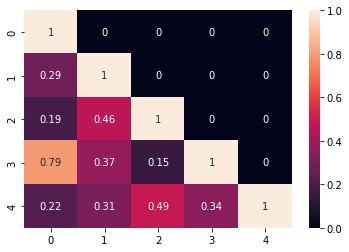

In [ ]:
#heatmap to show the calculated similarity values between all the sentence pairs

import matplotlib.pyplot as plt 
import seaborn as sns

sns.heatmap(sim, annot=True)

From this heatmap above, we see that sentence 3 and sentence 0 are closely related. It has a 

value of 79percent. This is a very high similarity index and truly if you read the sentence they 

mean the same point. However, we still have some similarity with significant values but they 
truly are not that related. LIke sentence 2 and 1. They only refer to the pandemic but have 

different context they were referring to.

Note thet i tried to write the sentences as different as i possible can. you can write more 

sentences yourself to illustrate this point

In [ ]:
# Alternatively, we are usng a different transformer model, the 'aoo-mpnet-base-v2' model, there are many others

model2 = st('all-mpnet-base-v2')
model2

# when we print the model we can observe that the max-length is 384, this is 3times more that the original SBERT mmodel, 
#the base model is a MPNetModel in this case. There is also an additional normalization layer in the sentence embedding

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [ ]:
# making the embeddings as we did earlier with the same sentences and calculating their cosine simliarity

embeddings = model2.encode(sentences)
embeddings.shape

sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
    sim[i:,i] = cs(embeddings[i], embeddings[i:])

sim

array([[1.0000006 , 0.        , 0.        , 0.        , 0.        ],
       [0.07740195, 1.00000083, 0.        , 0.        , 0.        ],
       [0.15885989, 0.26912549, 0.99999976, 0.        , 0.        ],
       [0.5129478 , 0.08956027, 0.10075042, 0.99999994, 0.        ],
       [0.06899022, 0.12905574, 0.22029799, 0.23913586, 1.00000012]])

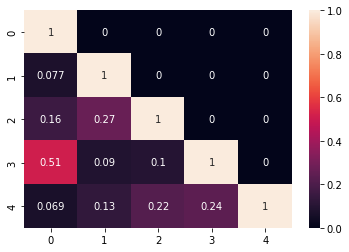

In [ ]:
# Plotting their similarity values on a heatmap to better visualise them

sns.heatmap(sim, annot=True)

From the heatmap avove, we can a see 
a high similarity vaalue between 

sentence 3 and 0, it is at 51percent 

which is lower when compared to the 

79percent form the original SBERT 

model. However, we also notice that 

the other valies have dropped 

significantly. WHat is the 

difference, it means that not only 

can this model better predict the 

similarity, it can also show the 

disparity between sentences also

In [ ]:
from google.colab import drive
drive.mount('/content/drive')